<a href="https://colab.research.google.com/github/medaminechafii/deeplearning-projects/blob/main/firstRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from tensorflow.keras.layers import Input,SimpleRNN,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import matplotlib.pyplot as plt


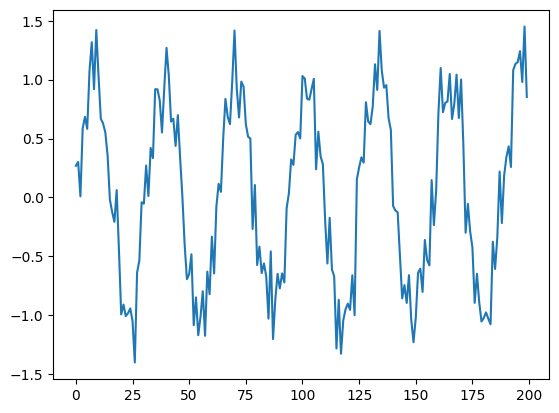

In [65]:
series = np.sin(0.2*np.arange(200))+0.2*np.random.randn(200)
plt.plot(series)
plt.show()

In [66]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
#X should be of shape NxTxD
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print(f"X shape : {X.shape}\nY shape : {Y.shape}")

X shape : (190, 10, 1)
Y shape : (190,)


In [67]:
#use RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss="mse",optimizer=Adam(learning_rate=0.01),)
#train model
r = model.fit(X[:-N//2],Y[:-N//2],epochs = 80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 1.2054 - val_loss: 0.9061
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7342 - val_loss: 0.6302
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5021 - val_loss: 0.5137
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4521 - val_loss: 0.4243
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3320 - val_loss: 0.3378
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2808 - val_loss: 0.2620
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2102 - val_loss: 0.2059
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1486 - val_loss: 0.1683
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1325 - val_loss: 0.1440
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1105 - val_loss: 0.1288
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0990 - val_loss: 0.1195
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0952 - val_loss: 0.1139


In [68]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

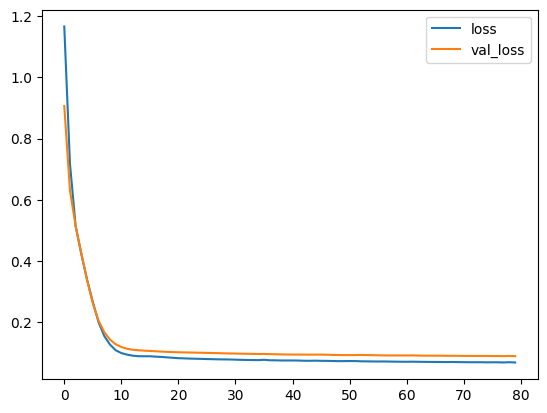

In [69]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [70]:
print(X[1].reshape(1,-1,1))

[[[0.30119577]
  [0.00972642]
  [0.58729364]
  [0.68433675]
  [0.58230905]
  [1.07216136]
  [1.31802424]
  [0.91929257]
  [1.42136265]
  [1.02887875]]]


In [71]:
#wrong forcast
validation_target = Y[-N//2:]
validation_predictions=[]
#index of first validation input
i = -N//2
while len(validation_predictions)<len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array to scalar
  i += 1
  validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

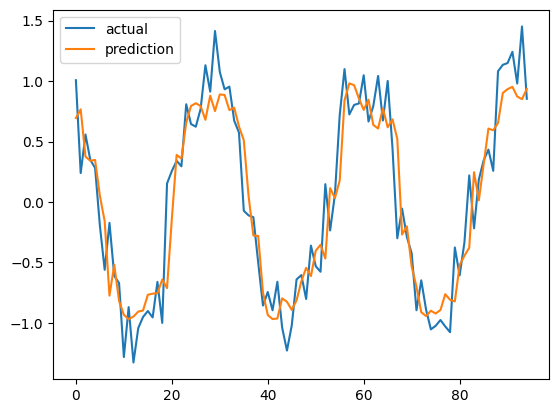

In [72]:
plt.plot(validation_target,label="actual")
plt.plot(validation_predictions,label="prediction")
plt.legend()
plt.show()

In [73]:
#right way of predicting
validation_target = Y[-N//2:]
validation_predictions=[]
#index of first validation input
last_x = X[-N//2]
while(len(validation_predictions)<len(validation_target)):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

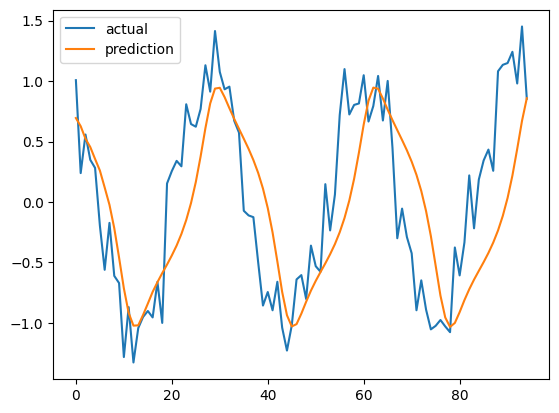

In [74]:
plt.plot(validation_target,label="actual")
plt.plot(validation_predictions,label="prediction")
plt.legend()
plt.show()